**MODELO PARA LA GENERACION DE DATOS ALEATORIOS PARA TIEMPOS DEL PROCESO DE CAMBIO DE ACEITE EN CARROS**


=== RESULTADOS DE LA SIMULACIÓN ===
Llegadas (Poisson, λ=3): [3, 4, 1, 3, 3, 2, 4, 1, 5, 4, 2, 1, 2, 2, 1, 3, 2, 2, 1, 4, 0, 1, 3, 7, 3, 2, 2, 4, 3, 2, 3, 3, 8, 3, 3, 3, 4, 3, 3, 2, 0, 3, 4, 3, 0, 2, 2, 3, 5, 5, 2, 3, 6, 3, 1, 4, 3, 2, 0, 2, 7, 7, 1, 1, 3, 3, 4, 2, 2, 2, 2, 5, 4, 4, 4, 1, 3, 7, 3, 5, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 1, 4, 2, 4, 1, 1, 4, 1, 2, 6, 3, 3, 2, 1, 2, 7, 6, 4, 1, 3, 4, 4, 4, 0, 2, 3, 3, 3, 3, 5, 5, 2, 0, 1, 1, 5, 2, 1, 4, 8, 3, 2, 4, 3, 1, 7, 5, 2, 3, 4, 2, 3, 2, 0, 1, 6, 1, 3, 4, 1, 2, 3, 5, 4, 5, 3, 1, 2, 3, 2, 2, 4, 2, 2, 5, 5, 2, 5, 2, 4, 1, 1, 5, 2, 4, 4, 1, 6, 5, 2, 1, 3, 6, 2, 2, 1, 6, 3, 2, 2, 3, 4, 9, 3, 5, 3, 7, 1, 2, 2, 1, 2, 4, 3, 3, 0, 4, 3, 3, 2, 2, 3, 2, 6, 4, 4, 0, 2, 3, 4, 1, 3, 1, 2, 2, 5, 6, 3, 0, 5, 3, 3, 1, 3, 0, 5, 2, 4, 1, 2, 2, 2, 1, 5, 5, 0, 5, 1, 0, 3, 1, 3, 2, 2, 2, 2, 6, 2, 4, 2, 0, 2, 5, 4, 2, 4, 1, 3, 4, 2, 2, 3, 5, 4, 1, 3, 4, 2, 4, 6, 3, 1, 5, 3, 3, 0, 3, 1, 3, 3, 3, 3, 5, 2, 4, 2, 6, 1, 2, 0, 3, 2, 3, 2, 4, 2, 1, 4, 3, 1, 3, 8

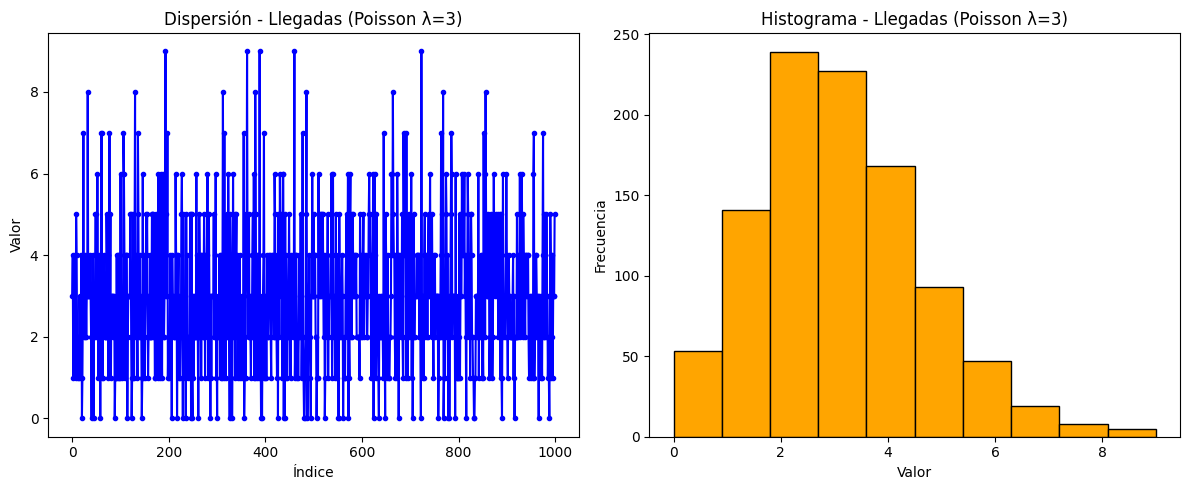

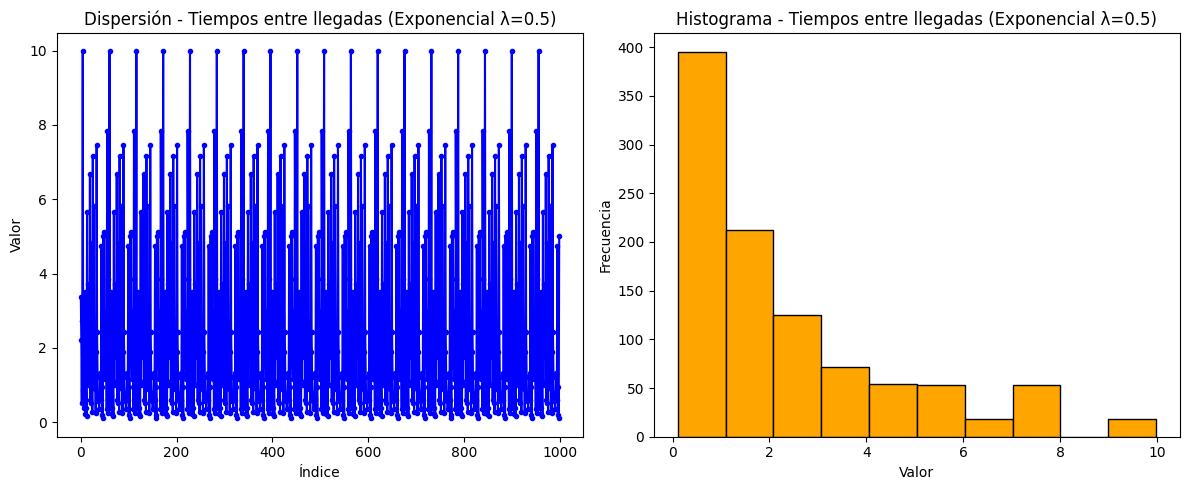

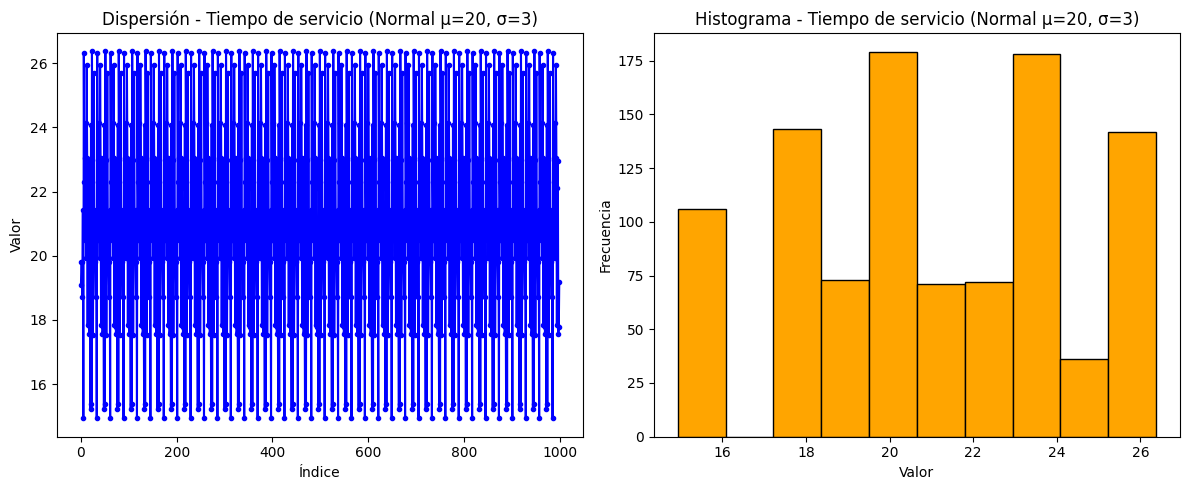

In [5]:
import math
import random
import time
import matplotlib.pyplot as plt

# === Generador base (producto constante) ===
def multiplicador_constante(semilla, a, d, n):
    numeros = []
    x = semilla
    for _ in range(n):
        producto = x * a
        producto_str = str(producto).zfill(2 * d)
        inicio = (len(producto_str) - d) // 2
        fin = inicio + d
        x = int(producto_str[inicio:fin])
        numeros.append(x)
    return numeros

# Normalizar a [0,1]
def uniformes(semilla, a, d, n):
    base = multiplicador_constante(semilla, a, d, n)
    return [x / (10**d - 1) for x in base]


# === Distribuciones ===
def poisson(semilla, a, d, n, lam):
    resultados = []
    for _ in range(n):
        L = math.exp(-lam)
        k, p = 0, 1
        while p > L:
            k += 1
            p *= random.random()
        resultados.append(k - 1)
    return resultados

def exponencial(semilla, a, d, n, lam):
    u = uniformes(semilla, a, d, n)
    return [-(1/lam) * math.log(1 - ui) for ui in u]

def normal(semilla, a, d, n, mu, sigma):
    u = uniformes(semilla, a, d, 2*n)
    resultados = []
    for i in range(0, len(u), 2):
        z = math.sqrt(-2 * math.log(u[i])) * math.cos(2 * math.pi * u[i+1])
        resultados.append(mu + sigma * z)
    return resultados[:n]


# === Gráfico ===
def graficar_numeros(numeros, titulo):
    """
    Grafica los números pseudoaleatorios generados en dos formas:
    - Dispersión (índice vs valor)
    - Histograma de distribución
    """
    plt.figure(figsize=(12, 5))

    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    plt.plot(range(len(numeros)), numeros, marker='o', linestyle='-', markersize=3, color='blue')
    plt.title(f"Dispersión - {titulo}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")

    # Histograma
    plt.subplot(1, 2, 2)
    plt.hist(numeros, bins=10, color='orange', edgecolor='black')
    plt.title(f"Histograma - {titulo}")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()


# =================== SIMULACIÓN ===================
def simulacion():
    # Parámetros fijos
    a = 3761
    d = 4
    semilla = int(time.time()) % 10000  

    # Entrada del usuario
    n = int(input("Ingrese la cantidad de horas/días a simular: "))

    # Generación de datos
    llegadas = poisson(semilla, a, d, n, lam=3)            # Cantidad de vehículos
    entre_llegadas = exponencial(semilla, a, d, n, lam=0.5) # Tiempos entre llegadas
    servicio = normal(semilla, a, d, n, mu=20, sigma=3)     # Tiempo de servicio

    # Mostrar resultados
    print("\n=== RESULTADOS DE LA SIMULACIÓN ===")
    print("Llegadas (Poisson, λ=3):", llegadas)
    print("Tiempos entre llegadas (Exponencial, λ=0.5):", [round(x,2) for x in entre_llegadas])
    print("Tiempos de servicio (Normal μ=20, σ=3):", [round(x,2) for x in servicio])

    # Graficar cada distribución
    graficar_numeros(llegadas, "Llegadas (Poisson λ=3)")
    graficar_numeros(entre_llegadas, "Tiempos entre llegadas (Exponencial λ=0.5)")
    graficar_numeros(servicio, "Tiempo de servicio (Normal μ=20, σ=3)")


# Ejecutar simulación
if __name__ == "__main__":
    simulacion()

